<a href="https://colab.research.google.com/github/naenumtou/ifrs9/blob/main/PD/BOTNPLData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

# Config
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style

In [3]:
# Clean data format
fileName = 'BOTNPLDataRaw.csv' #Need to manually upload

with open(fileName, 'r') as temp:
  colCounts = [len(l.split(',')) for l in temp.readlines()] #Get number of columns per lines

# Generate temporary columns name by number
colNames = [i for i in range(0, max(colCounts))]

In [4]:
# Read csv data
df = pd.read_csv(
    fileName,
    header = None,
    delimiter = ',',
    names = colNames
)

# Show table
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,Bank of Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FI_NP_001 : Gross NPLs and Net NPLs Outstandin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(Unit: Millions of Baht),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Last Updated : 23 Dec 2020 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Retrieved date : 24 Mar 2022 19:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,JUN 1998,NaN,JUL 1998,NaN,AUG 1998,NaN,SEP 1998,NaN,...,AUG 2019,NaN,SEP 2019,NaN,OCT 2019,NaN,NOV 2019,NaN,DEC 2019 p,NaN
6,NaN,NaN,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans
7,1,1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,Gross NPLs (Quarter),1780260,35.89,1867406,38.16,1936294,39.49,2086016,43.19,...,n.a.,n.a.,465683,3.17,n.a.,n.a.,n.a.,n.a.,460961,3.14
9,3,Net NPLs (Quarter),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,227659,1.58,n.a.,n.a.,n.a.,n.a.,233660,1.61


In [5]:
# Select data needed
df = df.iloc[5:, 1:]

# Show table
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,510,511,512,513,514,515,516,517,518,519
5,NaN,JUN 1998,NaN,JUL 1998,NaN,AUG 1998,NaN,SEP 1998,NaN,OCT 1998,...,AUG 2019,NaN,SEP 2019,NaN,OCT 2019,NaN,NOV 2019,NaN,DEC 2019 p,NaN
6,NaN,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans
7,1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Gross NPLs (Quarter),1780260,35.89,1867406,38.16,1936294,39.49,2086016,43.19,2188168,...,n.a.,n.a.,465683,3.17,n.a.,n.a.,n.a.,n.a.,460961,3.14
9,Net NPLs (Quarter),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,227659,1.58,n.a.,n.a.,n.a.,n.a.,233660,1.61


In [6]:
# Clean up data
df.iloc[0, 0] = 'Segment'
df.iloc[0, :] = df.iloc[0, :].ffill() #Forward fill for the date
df.columns = df.iloc[0, :] #Assign date to columns

# Show table
df.head(5)

5,Segment,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
5,Segment,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
6,NaN,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans
7,1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Gross NPLs (Quarter),1780260,35.89,1867406,38.16,1936294,39.49,2086016,43.19,2188168,...,n.a.,n.a.,465683,3.17,n.a.,n.a.,n.a.,n.a.,460961,3.14
9,Net NPLs (Quarter),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,227659,1.58,n.a.,n.a.,n.a.,n.a.,233660,1.61


In [7]:
# Drop row unused rows
searchfor = ['Gross', 'parties', 'AMC', 'Fine', 'Segment'] #Row contained these words will be dropped
df = df[~df['Segment'].str.contains('|'.join(searchfor), na = False)]

# Show table
df.head(5)

5,Segment,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
6,NaN,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans
7,1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Net NPLs (Quarter),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,227659,1.58,n.a.,n.a.,n.a.,n.a.,233660,1.61
13,2. Foreign Banks (full branch),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Net NPLs (Quarter),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,372,0.04,n.a.,n.a.,n.a.,n.a.,360,0.04


In [8]:
# Extract values and assign for segment
# Values
values = df.iloc[1:, 1:].shift(
    -1,
    axis = 0
).dropna().reset_index(
    drop = True
) #Shift to the same row as key segment

# Key segment
segment = df[
             ~df['Segment'].str.contains(
                 'NPLs', na = False
             )
].iloc[1:, :]['Segment'].reset_index(
    drop = True
) #Remove empty rows of values

# Show table
values.head(5)

5,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
0,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,227659,1.58,n.a.,n.a.,n.a.,n.a.,233660,1.61
1,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,372,0.04,n.a.,n.a.,n.a.,n.a.,360,0.04
2,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,228031,1.49,n.a.,n.a.,n.a.,n.a.,234020,1.52
3,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
4,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.


In [9]:
# Combine to wide format DataFrame
dfWide = pd.concat(
    [
     segment,
     values
    ],
    axis = 1
)

# Assign values types (Amount or %NPL)
dfWide = dfWide.set_index('Segment')
dfWide.loc['Type'] = df.iloc[0, 1:]

# Show table
dfWide.tail(3)

,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
Segment,,,,,,,,,,,,,,,,,,,,,
7. Credit Foncier Companies 3/,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
8. Total Financial Institutions (5+6+7),n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,230294,1.50,n.a.,n.a.,n.a.,n.a.,236492,1.53
Type,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans


In [10]:
# Assign 'n.a.' (String) for missing values (NaN, np.nan)
dfWide = dfWide.replace('n.a.', np.nan)

# Show table
dfWide.tail(3)

,JUN 1998,JUN 1998,JUL 1998,JUL 1998,AUG 1998,AUG 1998,SEP 1998,SEP 1998,OCT 1998,OCT 1998,...,AUG 2019,AUG 2019,SEP 2019,SEP 2019,OCT 2019,OCT 2019,NOV 2019,NOV 2019,DEC 2019 p,DEC 2019 p
Segment,,,,,,,,,,,,,,,,,,,,,
7. Credit Foncier Companies 3/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8. Total Financial Institutions (5+6+7),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,230294,1.50,NaN,NaN,NaN,NaN,236492,1.53
Type,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,...,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans,Amount,% to Total Loans


In [11]:
# Seperated data by values types (Amount or %NPL)
amount = []
npl = []

'''
Wide table is 1 on 1 swapping between Amount and %NPL.
If dividing evenly by 2, means Amount.
'''
for i in range(dfWide.shape[1]):
  if i % 2 == 0:
    amount.append(dfWide.iloc[:-1, i])
  else:
    npl.append(dfWide.iloc[:-1, i])

# To DataFrame
amount = pd.concat(amount, axis = 1)
npl = pd.concat(npl, axis = 1)

# Show table
amount.head(5)

,JUN 1998,JUL 1998,AUG 1998,SEP 1998,OCT 1998,NOV 1998,DEC 1998,JAN 1999,FEB 1999,MAR 1999,...,MAR 2019,APR 2019,MAY 2019,JUN 2019,JUL 2019,AUG 2019,SEP 2019,OCT 2019,NOV 2019,DEC 2019 p
Segment,,,,,,,,,,,,,,,,,,,,,
1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213883,NaN,NaN,217084,NaN,NaN,227659,NaN,NaN,233660
2. Foreign Banks (full branch),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276,NaN,NaN,288,NaN,NaN,372,NaN,NaN,360
3. Total Commercial Banks (1+2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,214159,NaN,NaN,217372,NaN,NaN,228031,NaN,NaN,234020
4. Finance Companies 3/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5. Total Financial Institutions (3+4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Create datetime to replace columns
'''
Date string format contained special character.
E.g., blank spaces or 'p' at the end.
Hence, it is better to create new datatime format.
'''
amount.columns = pd.date_range(
    start = pd.to_datetime(amount.columns[0][:-1]),
    periods = len(amount.columns),
    freq = 'M'
)

npl.columns = pd.date_range(
    start = pd.to_datetime(npl.columns[0][:-1]),
    periods = len(npl.columns),
    freq = 'M'
)

# Reset index
amount = amount.reset_index()
npl = npl.reset_index()

# Show table
amount.head(3)

,Segment,1998-06-30 00:00:00,1998-07-31 00:00:00,1998-08-31 00:00:00,1998-09-30 00:00:00,1998-10-31 00:00:00,1998-11-30 00:00:00,1998-12-31 00:00:00,1999-01-31 00:00:00,1999-02-28 00:00:00,...,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00
0,1. Commercial Banks registered in Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213883,NaN,NaN,217084,NaN,NaN,227659,NaN,NaN,233660
1,2. Foreign Banks (full branch),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276,NaN,NaN,288,NaN,NaN,372,NaN,NaN,360
2,3. Total Commercial Banks (1+2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,214159,NaN,NaN,217372,NaN,NaN,228031,NaN,NaN,234020


In [13]:
# Convert to long format DataFrame
amount = amount.melt(
    id_vars = ['Segment'],
    var_name = 'Date',
    value_name = 'Amount'
).sort_values(by = ['Segment', 'Date'])

npl = npl.melt(
    id_vars = ['Segment'],
    var_name = 'Date',
    value_name = 'NPLRatio'
).sort_values(by = ['Segment', 'Date'])

# Show table
amount.head(5)

,Segment,Date,Amount
0,1. Commercial Banks registered in Thailand,1998-06-30,NaN
8,1. Commercial Banks registered in Thailand,1998-07-31,NaN
16,1. Commercial Banks registered in Thailand,1998-08-31,NaN
24,1. Commercial Banks registered in Thailand,1998-09-30,NaN
32,1. Commercial Banks registered in Thailand,1998-10-31,NaN


In [14]:
# Combine table
dfClean = pd.merge(
    npl,
    amount,
    how = 'left',
    left_on = ['Segment', 'Date'],
    right_on = ['Segment', 'Date']
)

# Format data types
dfClean['NPLRatio'] = dfClean['NPLRatio'].astype(float)
dfClean['Amount'] = dfClean['Amount'].astype(float)

# To percentage of NPL Ratio
dfClean['NPLRatio'] = dfClean['NPLRatio'] / 100

# Show table
dfClean.tail(5)

,Segment,Date,NPLRatio,Amount
2067,8. Total Financial Institutions (5+6+7),2019-08-31,NaN,NaN
2068,8. Total Financial Institutions (5+6+7),2019-09-30,0.0150,230294.0
2069,8. Total Financial Institutions (5+6+7),2019-10-31,NaN,NaN
2070,8. Total Financial Institutions (5+6+7),2019-11-30,NaN,NaN
2071,8. Total Financial Institutions (5+6+7),2019-12-31,0.0153,236492.0


In [15]:
# Create short name of segment
nameMapping = {
    '1.  Commercial Banks registered in Thailand': 'ThaiBanks',
    '2.  Foreign Banks (full branch)': 'ForeignBanks',
    '3.  Total Commercial Banks (1+2)': 'TotalBanks',
    '4.  Finance Companies 3/': 'FinComps',
    '5.  Total Financial Institutions (3+4)': 'FinInst',
    '6.  New IBFs 4/': 'NewIBFs',
    '7.  Credit Foncier Companies 3/': 'CreditFon',
    '8.  Total Financial Institutions (5+6+7)': 'Total'
}

# Mapping
dfClean['SegmentName'] = dfClean['Segment'].map(nameMapping)
dfClean.head(5)

,Segment,Date,NPLRatio,Amount,SegmentName
0,1. Commercial Banks registered in Thailand,1998-06-30,NaN,NaN,ThaiBanks
1,1. Commercial Banks registered in Thailand,1998-07-31,NaN,NaN,ThaiBanks
2,1. Commercial Banks registered in Thailand,1998-08-31,NaN,NaN,ThaiBanks
3,1. Commercial Banks registered in Thailand,1998-09-30,NaN,NaN,ThaiBanks
4,1. Commercial Banks registered in Thailand,1998-10-31,NaN,NaN,ThaiBanks


In [16]:
# Remove rows before first valid index
# Find first valid index
firstIndex = dfClean.groupby(
    ['SegmentName'],
    sort = False
)['NPLRatio'].apply(lambda x: x.first_valid_index())

NPLData = []

for segment in dfClean['SegmentName'].unique():
  NPLData.append(
      dfClean.query(
          "SegmentName == @segment"
      ).loc[firstIndex[segment]:]
  )

# To DataFrame
NPLData = pd.concat(
    NPLData,
    axis = 0,
    ignore_index = True
)

NPLData.head(5)

,Segment,Date,NPLRatio,Amount,SegmentName
0,1. Commercial Banks registered in Thailand,2006-12-31,0.0447,228212.0,ThaiBanks
1,1. Commercial Banks registered in Thailand,2007-01-31,0.0447,228212.0,ThaiBanks
2,1. Commercial Banks registered in Thailand,2007-02-28,0.0447,228212.0,ThaiBanks
3,1. Commercial Banks registered in Thailand,2007-03-31,0.0457,235210.0,ThaiBanks
4,1. Commercial Banks registered in Thailand,2007-04-30,0.0457,235210.0,ThaiBanks


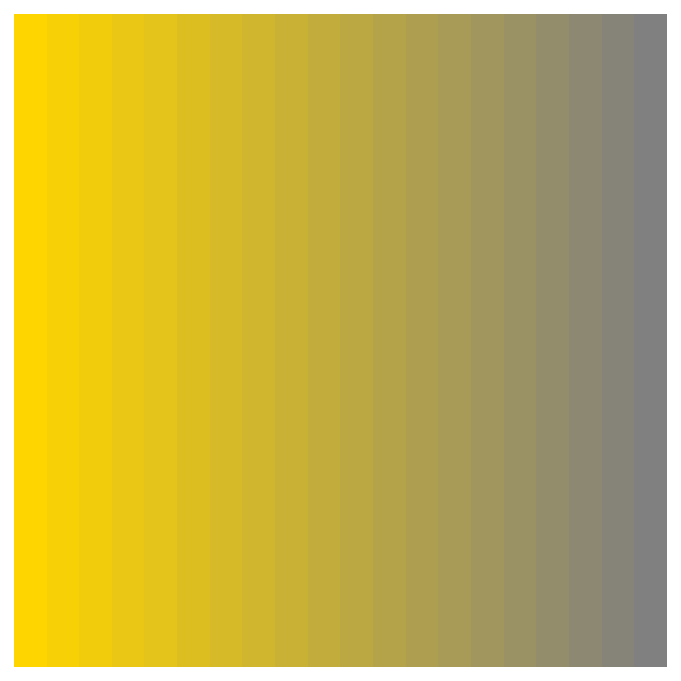

In [17]:
# Create matplot color map for the theme
# Define color code
colorY = '#ffd500'
colorG = '#808080'
colors = [colorY, colorG] #List of colors

# Colors map
cmapTheme = LinearSegmentedColormap.from_list(
    'Custom',
    colors,
    N = 20
)

# Plot
example = np.indices((20, 20))[1]
plt.figure(figsize = (10, 6))
plt.imshow(
    example,
    cmap = cmapTheme
)
plt.axis('off')
plt.show()

In [18]:
# Register to seaborn
plt.cm.register_cmap('Theme', cmapTheme)

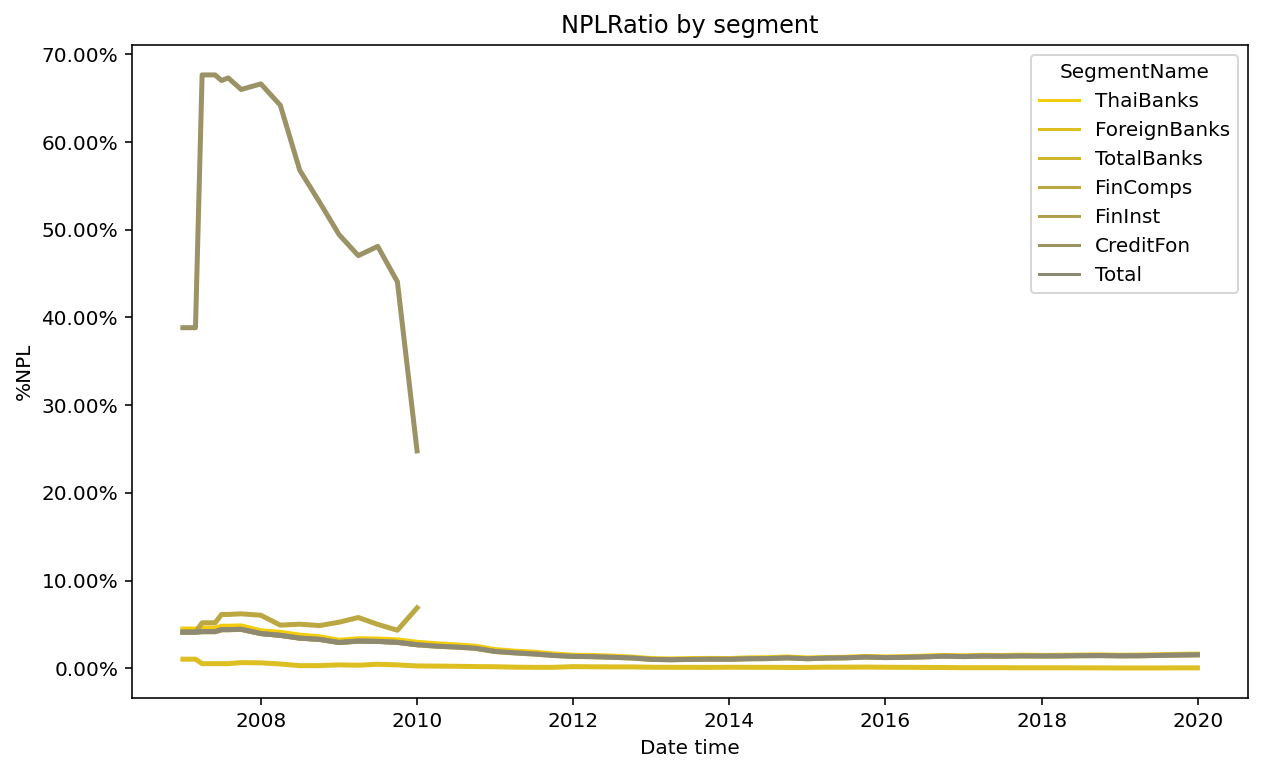

In [19]:
# Plot
plt.figure(figsize = (10, 6))
ax = sns.lineplot(
  x = 'Date',
  y = 'NPLRatio',
  data = NPLData,
  hue = 'SegmentName',
  legend = 'full',
  palette = sns.color_palette(
      'Theme',
      n_colors = len(NPLData['SegmentName'].unique())
  ),
  linewidth = 2.5,
  ci = None
)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: '{0:.2f}%'.format(x * 100))
)
ax.set_title('NPLRatio by segment')
ax.set(xlabel = 'Date time', ylabel = '%NPL')
plt.show()

In [20]:
# Export
NPLData.to_csv('cleanBOTNPLData.csv', index = 0)